# <center> Домашнее задание 2.6.Data_analysis2

Импортируем все необходимые библиотеки и немного настроим отображение картинок.

In [1]:
import pandas as pd
import csv
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16,7
#import matplotlib.pyplot as plt

Для начала необходимо загрузить "сырые" данные из файла:

In [2]:
def csv_to_dataframe(year):
    file_name = f'names/yob{year}.txt'
    dataframe = pd.read_csv(file_name, header=None, names=['name', 'gender', 'count'])
    dataframe['year'] = year
    return dataframe

Для того чтобы загрузить данные сразу за несколько лет, используем "собирающую" функцию:

In [3]:
def many_csv_to_dataframe(years):
    dataframe_all = pd.DataFrame()
    for year in years:
        if dataframe_all.empty:
            dataframe_all = csv_to_dataframe(year)
        else:
            dataframe_all = pd.concat([dataframe_all, csv_to_dataframe(year)])
    return dataframe_all

Построим функцию, которая по указанным именам за указанный период в разрезе каждого года показывает частоту использования этих имен при рождении детей: 

In [4]:
def names_years_dinamic(start_year, end_year, *names):
    dataframe_all = many_csv_to_dataframe(year for year in range(start_year,end_year+1))
    dataframe_all = dataframe_all[['year','name','count']]
    dataframe_names = dataframe_all[dataframe_all['name'].isin(list(names))].groupby(['year','name']).sum()
    dataframe_names = dataframe_names.unstack('name')
    return dataframe_names

Построим график показывающий динамику частоту использования имени с течением времени в 1900-2000 годах для 'Ruth' и 'Robert':

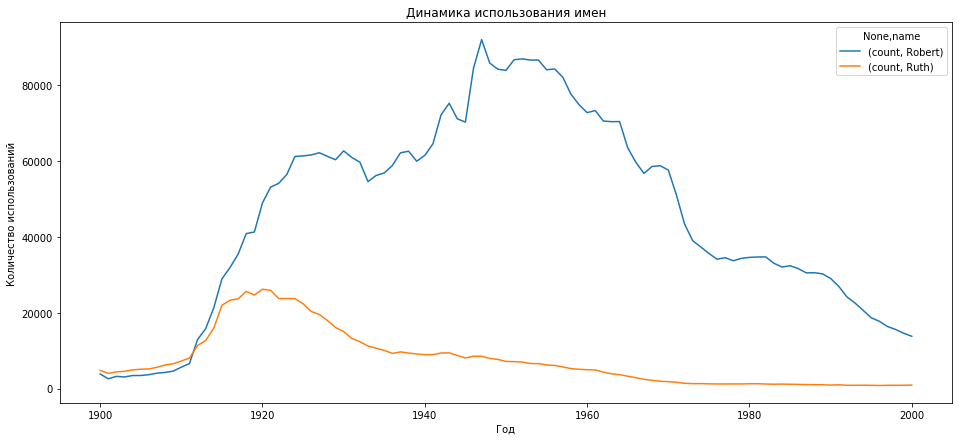

In [5]:
ruth_robert = names_years_dinamic(1900,2000,'Ruth','Robert')
ruth_robert_plot = ruth_robert.plot()
ruth_robert_plot.set_xlabel('Год')
ruth_robert_plot.set_ylabel('Количество использований')
ruth_robert_plot.set_title('Динамика использования имен')
ruth_robert_plot

Сейчас попробуем прорядить данные, сделав выборку не за каждый год, а с интервалом в 5 лет, посмторим что полуичлось:

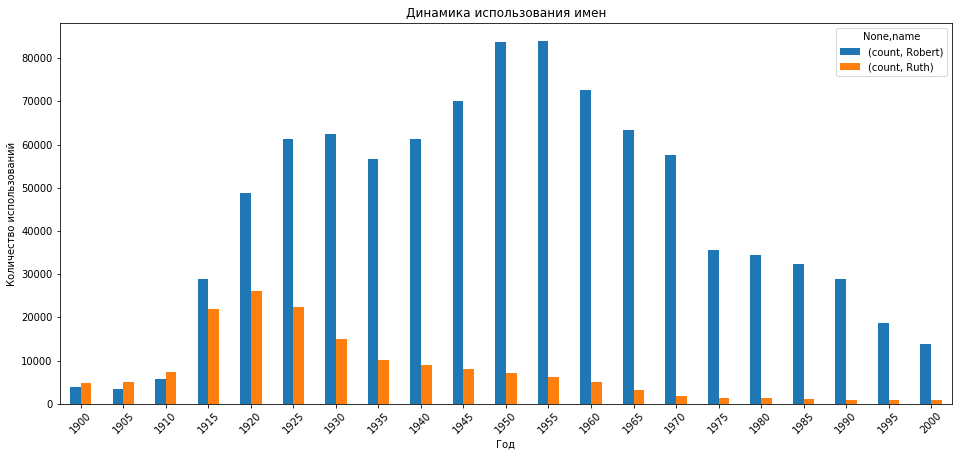

In [6]:
ruth_robert_bar = ruth_robert[ruth_robert.index.get_level_values(0).isin(list(x for x in range(1900,2000+1) if x % 5 == 0))]
ruth_robert_bar_plot = ruth_robert_bar.plot(kind='bar', rot=45)
ruth_robert_bar_plot.set_xlabel('Год')
ruth_robert_bar_plot.set_ylabel('Количество использований')
ruth_robert_bar_plot.set_title('Динамика использования имен')
ruth_robert_bar_plot

Построим функцию, которая в указанный год с указанным началом имени находит все имена, выбирает из них 10 самых популярных:

In [7]:
def start_in_name_of_year(start_name,year):
    dataframe_of_year = csv_to_dataframe(year)
    dataframe_of_year = dataframe_of_year.groupby(['name','year']).sum().reset_index('name').reset_index('year', drop=True)
    dataframe_of_year = dataframe_of_year[dataframe_of_year['name'].
                                              str[:len(start_name)] ==
                                          start_name].sort_values('count', ascending=False).head(10)
    dataframe_of_year = dataframe_of_year.set_index(['name'])
    return dataframe_of_year

Давайте попробуем взять 1950 год и посмотреть самые популярные имена начинающиеся на 'R':

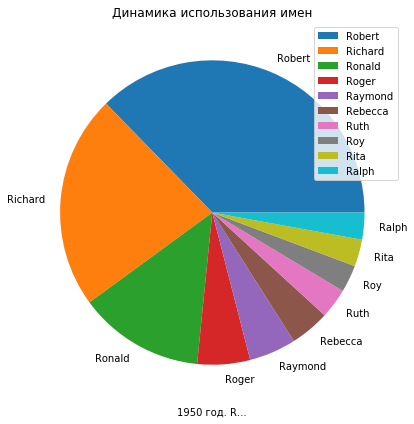

In [8]:
start_name = 'R'
year = '1950'
start_name_R_1950 = start_in_name_of_year(start_name,year)
start_name_R_1950_plot = start_name_R_1950.plot(kind='pie', y='count')
start_name_R_1950_plot.set_ylabel('')
start_name_R_1950_plot.set_xlabel(f'{year} год. {start_name}...')
start_name_R_1950_plot.set_title('Динамика использования имен')
start_name_R_1950_plot

А сейчас попробуем посчитать насколько часто в указанный период используются имена при рождении, в зависимости от количества согласных букв в этих именах:

In [9]:
def find_count_consonants(string_in):
    count_consonants = sum(1 for x in string_in if x not in 'aeiouy')
    return count_consonants

def name_consonants(start_year, end_year):
    dataframe_all = many_csv_to_dataframe(year for year in range(start_year,end_year+1))
    dataframe_all = dataframe_all[['name','count']].groupby('name').sum().sort_values('count', ascending=False)
    dataframe_all.reset_index(inplace=True)
    dataframe_all['find_count_consonants'] = dataframe_all.apply(lambda x: find_count_consonants(x['name']), axis=1)
    return dataframe_all

Построим точечную диаграмму для периода 1900-2000 годов:

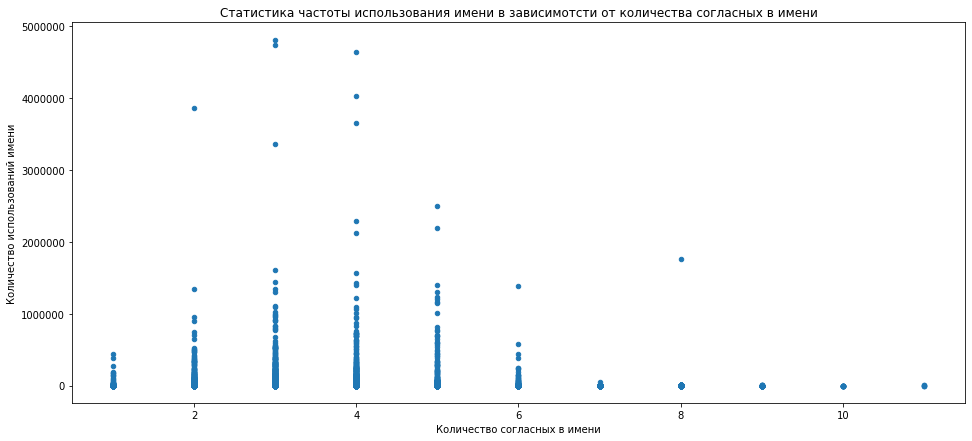

In [10]:
consonants_in_names = name_consonants(1900,2000)
consonants_in_names_plot = consonants_in_names.plot.scatter(x = 'find_count_consonants', y = 'count')
consonants_in_names_plot.set_xlabel('Количество согласных в имени')
consonants_in_names_plot.set_ylabel('Количество использований имени')
consonants_in_names_plot.set_title('Cтатистика частоты использования имени в зависимотсти от количества согласных в имени')
consonants_in_names_plot